In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
diabetes=pd.read_csv('diabetes.csv')#dataset imported


In [4]:
for feature in diabetes:
    Q1=diabetes[feature].quantile(0.25)
    Q3=diabetes[feature].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR#Any value below the lower threshold is considered a low outlier.
    upper=Q3-1.5*IQR#Any value below the higher threshold is considered a higher outlier.
    if diabetes[(diabetes[feature]>upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature,"no")

Pregnancies yes
Glucose yes
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome yes


In [5]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in features:
    Q1 = diabetes[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count the number of outliers
    num_outliers = ((diabetes[feature] < lower) | (diabetes[feature] > upper)).sum()
    
    # Store in dictionary
    outlier_counts[feature] = num_outliers

# Convert dictionary to DataFrame for better visualization
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display the outlier counts in table format
print(outlier_df)


                    Feature  Outlier Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             45
3             SkinThickness              1
4                   Insulin             34
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9


In [6]:
#conducting a stand alone observation review for the insulin variable
#suppressing contradictory values
Q1=diabetes.Insulin.quantile(0.25)
Q3=diabetes.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q3-1.5*IQR
upper=Q3+1.5*IQR
diabetes.loc[diabetes["Insulin"]>upper,"Insulin"]=upper

C:\Users\sajiv\AppData\Local\Temp\ipykernel_6172\3522423560.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes.loc[diabetes["Insulin"]>upper,"Insulin"]=upper


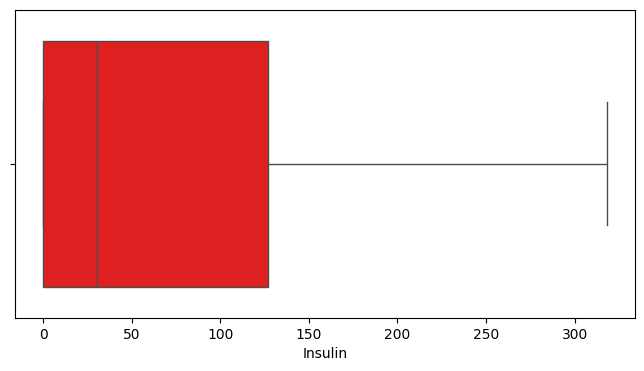

In [9]:
#outlier observation of insulin
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.boxplot(x=diabetes["Insulin"],color='red');

In [10]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in features:
    Q1 = diabetes[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count the number of outliers
    num_outliers = ((diabetes[feature] < lower) | (diabetes[feature] > upper)).sum()
    
    # Store in dictionary
    outlier_counts[feature] = num_outliers

# Convert dictionary to DataFrame for better visualization
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display the outlier counts in table format
print(outlier_df)


                    Feature  Outlier Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             45
3             SkinThickness              1
4                   Insulin              0
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9


In [11]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Create a copy of the dataset to avoid modifying the original
diabetes_cleaned = diabetes.copy()

for feature in features:
    Q1 = diabetes_cleaned[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes_cleaned[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Remove rows that have outliers in the feature
    diabetes_cleaned = diabetes_cleaned[(diabetes_cleaned[feature] >= lower) & (diabetes_cleaned[feature] <= upper)]

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", diabetes.shape)
print("Cleaned dataset shape:", diabetes_cleaned.shape)


Original dataset shape: (768, 9)
Cleaned dataset shape: (669, 9)


In [12]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in features:
    Q1 = diabetes[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count the number of outliers
    num_outliers = ((diabetes[feature] < lower) | (diabetes[feature] > upper)).sum()
    
    # Store in dictionary
    outlier_counts[feature] = num_outliers

# Convert dictionary to DataFrame for better visualization
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display the outlier counts in table format
print(outlier_df)


                    Feature  Outlier Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             45
3             SkinThickness              1
4                   Insulin              0
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9


In [15]:
#conducting a stand alone observation review for the insulin variable
#suppressing contradictory values
Q1=diabetes.BloodPressure.quantile(0.25)
Q3=diabetes.BloodPressure.quantile(0.75)
IQR=Q3-Q1
lower=Q3-1.5*IQR
upper=Q3+1.5*IQR
diabetes.loc[diabetes["BloodPressure"]>upper,"BloodPressure"]=upper

In [16]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in features:
    Q1 = diabetes[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count the number of outliers
    num_outliers = ((diabetes[feature] < lower) | (diabetes[feature] > upper)).sum()
    
    # Store in dictionary
    outlier_counts[feature] = num_outliers

# Convert dictionary to DataFrame for better visualization
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display the outlier counts in table format
print(outlier_df)


                    Feature  Outlier Count
0               Pregnancies              4
1                   Glucose              5
2             BloodPressure             38
3             SkinThickness              1
4                   Insulin              0
5                       BMI             19
6  DiabetesPedigreeFunction             29
7                       Age              9
